# **Introduction**
---

**About Dataset**
---

This **dataset** consists of more than **four hundred thousand handwritten names** collected through **charity projects** to ***support disadvantaged children*** around the world.

***Optical Character Recognition (OCR)*** utilizes **image processing technologies** to convert characters on **scanned documents** into **digital forms**. It typically performs well in **machine printed fonts**. However, it still poses a **difficult challenges** for machines to **recognize handwritten characters**, because of the huge variation in individual writing styles. Although **deep learning** is pretty **robust** to such changes. 

**Data Structure**
---

This data set is a **comprehensive collection of handwritten images** and their corresponding **text**. The data set is divided into **4 distinct sections** to facilitate ***training, testing, and validation*** of machine learning models.

* The first section, named ***CSV***, contains **CSV files** with the **Image file names and text for training, testing, and validation purposes**. These files can be used to build, train, and evaluate machine learning models.

* The second section, named ***test_v2***, is a directory containing **41.4K testing images**. These images can be used to evaluate the performance of the machine learning models on unseen data.

* The third section, named ***train_v2***, is a directory containing **331K training images**. These images can be used to train the machine learning models on a large and diverse set of handwriting samples.

* The fourth section, named ***validation_v2***, is a directory containing **41.4K validation images**. These images can be used to tune the machine learning models' hyperparameters and to prevent overfitting.

Overall, this data set provides a rich resource for training and testing machine learning models on handwritten OCR tasks.

**Notebook Structure**
---

This notebook is structured into **8 sections**, each focusing on different aspects of building an ***OCR (Optical Character Recognition) model***.

* **SetUp** : In this section, we **import all the necessary modules** and set **hyperparameters and constants** required for **data loading and model building**. This includes setting the batch size, learning rate, and image size.

* **Data Loading** : In this section, we load the **data into memory from the source directory**. This includes **reading the image files and their corresponding labels**. We also split the data into train and validation sets.

* **Label Preprocessing** : Since the **labels are in categorical format**, we create a dictionary to map each **unique label to a numeric value**. We also create a **reverse mapping dictionary to convert the numeric labels back to their original categorical form**.

* **Data Functions** : In this section, we create **helper functions** to **load the data** from the directories and convert the **labels to their numeric values**. We also create functions to **preprocess the images by resizing and normalizing them**.

* **Data Visualization** : Here, we take a **visual look at the data and its respective labels**. This includes plotting some sample images with their labels to understand the structure and content of the data.

* **CTC Loss** : ***CTC (Connectionist Temporal Classification)*** is a type of **loss function** used in **training OCR models**. In this section, we create a **CTC loss layer** that we will use in the **OCR model**.

* **OCR Model** : In this section, we focus on building the **OCR model**. The model architecture is based on a combination of ***convolutional neural networks (CNNs)*** and ***recurrent neural networks (RNNs)*** in an **encoder-decoder framework**. The ***CNNs*** are used for **feature extraction**, while the ***RNNs*** are used for **sequence modeling**. Finally, we train the model using the **CTC loss function** and evaluate its performance on the **validation set**.

* **Model Predictions** : In this section, we visualize the **model predictions** by plotting the **predictions** against their **true values and the respective image**.

# **SetUp**

Below are all the modules that are used in the notebook.

In [70]:
# Common
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import clear_output as cls

# Data
from glob import glob
from tqdm import tqdm
import tensorflow.data as tfd

# Data Visualization
import matplotlib.pyplot as plt

# Model
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras import layers

In the **data loading and model building process**, various constants are defined and used to **streamline the workflow** **and** ensure consistency in the results. Below are some of the essential constants used in the process:

* **IMG_WIDTH**: This constant defines the width of the input image and is used in the preprocessing step to resize the images.

* **IMG_HEIGHT**: This constant defines the height of the input image and is used in the preprocessing step to resize the images.

* **BATCH_SIZE**: This constant defines the number of images to be processed in a single batch during training and testing.

* **EPOCHS**: This constant defines the number of times the training data set is passed through the model during the training process.

* **LEARNING_RATE**: This constant defines the rate at which the model's weights are updated during training and affects how quickly the model learns.

* **NUM_CLASSES**: This constant defines the number of classes in the data set, which is used to define the output layer of the model.

* **SEED**: This constant is used to set the random seed, ensuring that the results are reproducible.

* **TRAIN_CSV**: This constant defines the path to the CSV file containing the training data set's file names and labels.

* **TEST_CSV**: This constant defines the path to the CSV file containing the testing data set's file names and labels.

* **VALID_CSV**: This constant defines the path to the CSV file containing the validation data set's file names and labels.

By defining these constants and using them throughout the data loading and model building process, it is possible to achieve consistent and reproducible results.

In [2]:
# Image Size
IMG_WIDTH = 200
IMG_HEIGHT = 50
IMAGE_SIZE = (IMG_WIDTH, IMG_HEIGHT)

# Batch Size
BATCH_SIZE = 16

# EPOCHS
EPOCHS = 100

# Model Name
MODEL_NAME = 'Handwritten-model'

# Callbacks
CALLBACKS = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    callbacks.ModelCheckpoint(filepath=MODEL_NAME + ".h5", save_best_only=True)
]

# Learning Rate
LEARNING_RATE = 1e-3

# Random Seed
np.random.seed(2569)
tf.random.set_seed(2569)

# File Paths
train_csv_path = '/kaggle/input/handwriting/CSV/written_name_train.csv'
valid_csv_path = '/kaggle/input/handwriting/CSV/written_name_validation.csv'
test_csv_path = '/kaggle/input/handwriting/CSV/written_name_test.csv'

train_image_dir = '/kaggle/input/handwriting/train_v2/train'
valid_image_dir = '/kaggle/input/handwriting/validation_v2/validation'
test_image_dir = '/kaggle/input/handwriting/test_v2/test'

# Data Size
TRAIN_SIZE = BATCH_SIZE * 1000
VALID_SIZE = BATCH_SIZE * 500
TEST_SIZE  = BATCH_SIZE * 100

# AUTOTUNE
AUTOTUNE = tfd.AUTOTUNE

# **Data Loading**
---

To load the **images with their respective labels** in the OCR task, we need to first examines the **CSV files** containing the **file names and corresponding text written in the images**. By parsing these CSV files, the notebook can **load the images and their labels efficiently**. This approach simplifies the data loading process and facilitates the model building process.

In [3]:
# Train CSV
train_csv = pd.read_csv(train_csv_path)[:TRAIN_SIZE]

# Validation CSV
valid_csv = pd.read_csv(valid_csv_path)[:VALID_SIZE]

# Test CSV
test_csv = pd.read_csv(test_csv_path)[:TEST_SIZE]

In [4]:
train_csv.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


This is going to be really useful because we already have the **root paths** for training, validation and testing directories. Using both we can parse through the **data set and load it efficiently**. 

---
In the **OCR task**, before loading all the images, we first need to obtain the **target characters** by **retrieving all the labels**. By collecting all the labels from the **CSV files**, we can determine the **unique characters** present in the data set. This **step is crucial** for building the ***OCR model***, as it helps to **determine the number of classes** the model will need to recognize.

In [5]:
# Get all train labels
train_labels = [str(word) for word in train_csv['IDENTITY'].to_numpy()]
train_labels[:10]

['BALTHAZAR',
 'SIMON',
 'BENES',
 'LA LOVE',
 'DAPHNE',
 'LUCIE',
 'NASSIM',
 'ASSRAOUI',
 'LAVIAN',
 'MAEVA']

From these words, we need to extract the **unique characters**.

In [6]:
# Unique characters
unique_chars = set(char for word in train_labels for char in word)
n_classes = len(unique_chars)

# Show
print(f"Total number of unique characters : {n_classes}")
print(f"Unique Characters : \n{unique_chars}")

Total number of unique characters : 41
Unique Characters : 
{'D', 'B', 'a', 'Z', 'P', 'C', 'M', 's', 'e', 'y', 'n', 'E', 'O', 'U', 'G', 'I', 'X', 'u', 't', 'F', 'R', 'p', 'J', "'", 'c', 'H', 'N', 'V', 'K', 'L', 'r', 'Q', 'W', ' ', '-', 'S', 'o', 'Y', 'A', 'T', 'l'}


In [7]:
MAX_LABEL_LENGTH = max(map(len, train_labels))
print(f"Maximum length of a label : {MAX_LABEL_LENGTH}")

Maximum length of a label : 24


For now, in this **CSV files**, we have the **file name and the respective text** written in the image. Let's do one thing, let's add the **full path with the filename**.

In [8]:
train_csv['FILENAME'] = [train_image_dir + f"/{filename}" for filename in train_csv['FILENAME']]
valid_csv['FILENAME'] = [valid_image_dir + f"/{filename}" for filename in valid_csv['FILENAME']]
test_csv['FILENAME']  = [test_image_dir + f"/{filename}" for filename in test_csv['FILENAME']]

In [9]:
train_csv.head()

,FILENAME,IDENTITY
0,/kaggle/input/handwriting-recognitionocr/train...,BALTHAZAR
1,/kaggle/input/handwriting-recognitionocr/train...,SIMON
2,/kaggle/input/handwriting-recognitionocr/train...,BENES
3,/kaggle/input/handwriting-recognitionocr/train...,LA LOVE
4,/kaggle/input/handwriting-recognitionocr/train...,DAPHNE


# **Label Preprocessing**

To feed the **labels to deep learning models**, we need to convert the **string format into numerical values**. To do this, we'll create **two dictionaries**: one that maps ***categorical values to numerical values***, and another that maps those ***numerical values back to the original strings*** for inference. These mappings are crucial for building an accurate OCR model.

In [10]:
# Character to numeric value dictionary
char_to_num = layers.StringLookup(
    vocabulary = list(unique_chars),
    mask_token = None
)

# Reverse dictionary
num_to_char = layers.StringLookup(
    vocabulary = char_to_num.get_vocabulary(),
    mask_token = None, 
    invert = True
)

# **Data Functions**

We'll create some **helper functions** to **load the images and encode the labels**. These functions will help us prepare our data for ***training, validation, and testing***.

* The ***load_image*** function will take an image path and return the loaded image as a NumPy array.
* The ***encode_single_sample*** function will take an image path and label, and return the encoded image and label.

These helper functions will **streamline our data preprocessing**, making it easier to train our OCR model.

In [11]:
def load_image(image_path : str):
    '''
    This function loads and preprocesses images. It first receives the image path, which is used to
    decode the image as a JPEG using TensorFlow. Then, it converts the image to a tensor and applies 
    two processing functions: resizing and normalization. The processed image is then returned by 
    the function.
    
    Argument : 
        image_path : The path of the image file to be loaded.
    
    Return:
        image : The loaded image as a tensor.
    '''
    
    # Read the Image
    image = tf.io.read_file(image_path)
    
    # Decode the image
    decoded_image = tf.image.decode_jpeg(contents = image, channels = 1)
    
    # Convert image data type.
    cnvt_image = tf.image.convert_image_dtype(image = decoded_image, dtype = tf.float32)
    
    # Resize the image
    resized_image = tf.image.resize(images = cnvt_image, size = (IMG_HEIGHT, IMG_WIDTH))
    
    # Transpose
    image = tf.transpose(resized_image, perm = [1, 0, 2])
    
    # Convert image to a tensor.
    image = tf.cast(image, dtype = tf.float32)
    
    # Return loaded image
    return image

In [12]:
def encode_single_sample(image_path : str, label : str):
    
    '''
    The function takes an image path and label as input and returns a dictionary containing the processed image tensor and the label tensor. 
    First, it loads the image using the load_image function, which decodes and resizes the image to a specific size. Then it converts the given
    label string into a sequence of Unicode characters using the unicode_split function. Next, it uses the char_to_num layer to convert each
    character in the label to a numerical representation. It pads the numerical representation with a special class (n_classes)
    to ensure that all labels have the same length (MAX_LABEL_LENGTH). Finally, it returns a dictionary containing the processed image tensor
    and the label tensor.
    
    Arguments : 
        image_path : The location of the image file.
        label      : The text to present in the image.
    
    Returns:
        dict : A dictionary containing the processed image and label.
    '''
    
    # Get the image
    image = load_image(image_path)
    
    # Convert the label into characters
    chars = tf.strings.unicode_split(label, input_encoding='UTF-8')
    
    # Convert the characters into vectors
    vecs = char_to_num(chars)
    
    # Pad label
    pad_size = MAX_LABEL_LENGTH - tf.shape(vecs)[0]
    vecs = tf.pad(vecs, paddings = [[0, pad_size]], constant_values=n_classes+1)
    
    return {'image':image, 'label':vecs}

Now it's time to apply these functions and get our data.

In [13]:
# Training Data
train_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(train_csv['FILENAME'].to_list()), np.array(train_csv['IDENTITY'].to_list()))
).shuffle(1000).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Validation data
valid_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(valid_csv['FILENAME'].to_list()), np.array(valid_csv['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Testing data.
test_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(test_csv['FILENAME'].to_list()), np.array(test_csv['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

Let's have a look at the **data distribution**.

In [14]:
print(f"Training Data Size   : {tf.data.Dataset.cardinality(train_ds).numpy() * BATCH_SIZE}")
print(f"Validation Data Size : {tf.data.Dataset.cardinality(valid_ds).numpy() * BATCH_SIZE}")
print(f"Testing Data Size    : {tf.data.Dataset.cardinality(test_ds).numpy() * BATCH_SIZE}")

Training Data Size   : 16000
Validation Data Size : 8000
Testing Data Size    : 1600


That is exactly what we were looking for.

# **Data Visualization**

**Visualizing data** can help us **better understand and frame a solution** for the problem at hand, even if we are already familiar with the data. 

In [74]:
def show_images(data, GRID=[4,4], FIGSIZE=(25, 8), cmap='binary_r', model=None, decode_pred=None):
    
    # Plotting configurations
    plt.figure(figsize=FIGSIZE)
    n_rows, n_cols = GRID
    
    # Loading Data 
    data = next(iter(data))
    images, labels = data['image'], data['label']
    
    # Iterate over the data 
    for index, (image, label) in enumerate(zip(images, labels)):
        
        # Label processing
        text_label = num_to_char(label)
        text_label = tf.strings.reduce_join(text_label).numpy().decode('UTF-8')
        text_label = text_label.replace("[UNK]", " ").strip()
        
        # Create a sub plot
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(tf.transpose(image, perm=[1,0,2]), cmap=cmap)
        plt.axis('off')
        
        if model is not None and decode_pred is not None:
            # Make prediction
            pred = model.predict(tf.expand_dims(image, axis=0))
            pred = decode_pred(pred)[0]
            title = f"True : {text_label}\nPred : {pred}"
            plt.title(title)
        else:
            # add title
            plt.title(text_label)

    # Show the final plot
    cls()
    plt.show()

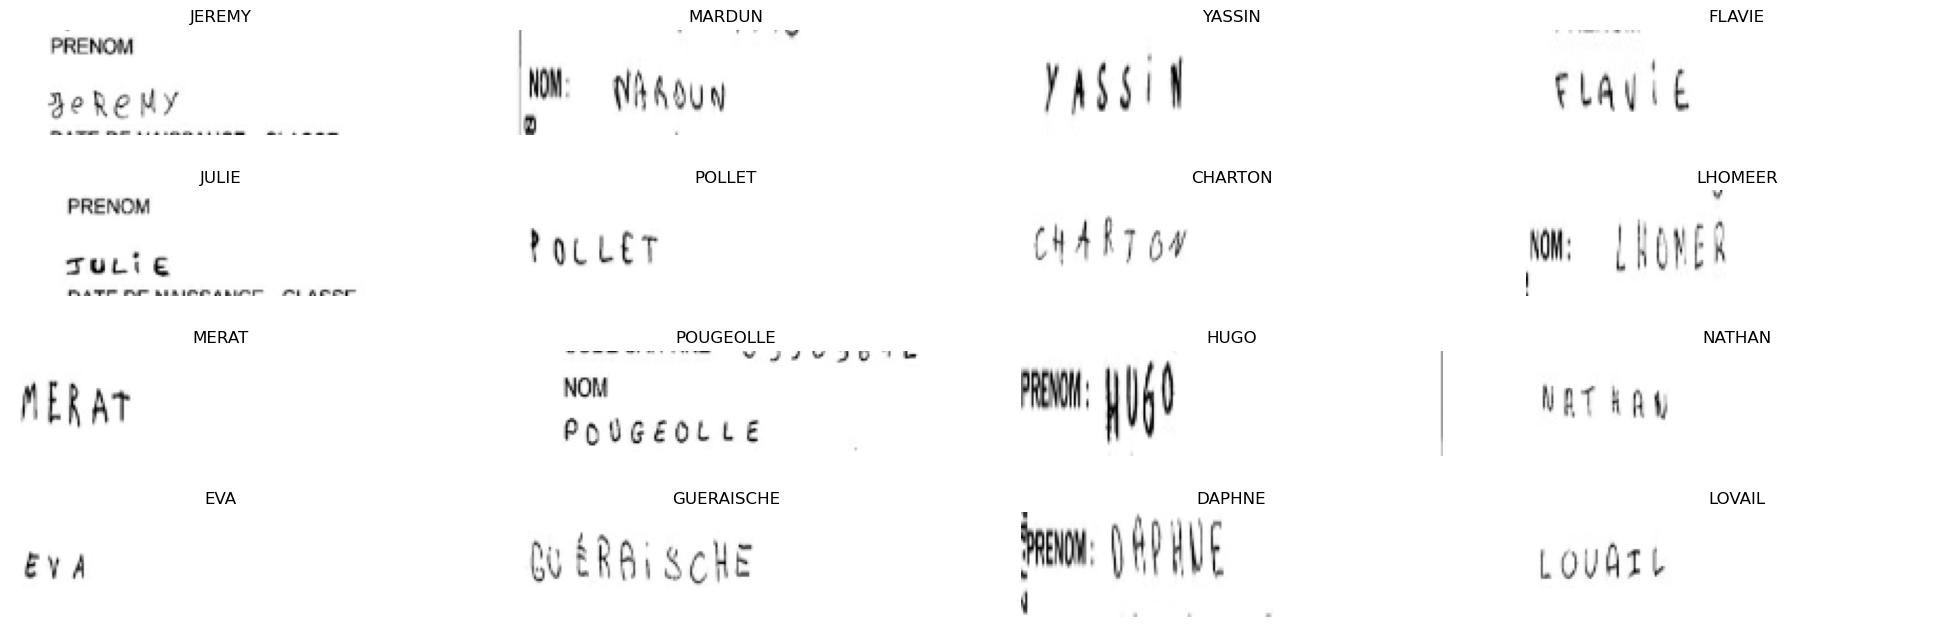

In [75]:
show_images(data=train_ds, cmap='gray')

This task is going to be **challenging due to the difficulty of recognizing handwriting accurately**. Additionally, the model will need to be able to **distinguish and ignore any unwanted text that may be present in the image**. 

Given the difficulty of the task at hand, it's important to **focus on developing a robust solution** that can **effectively handle the challenges** posed by the **handwriting and unwanted text**. To this end, we can turn to **transformer networks**, which have shown great promise in a wide range of **natural language processing tasks**. By leveraging the power of these **advanced models**, we can create a system that is **capable of accurately recognizing and transcribing text from complex, handwritten documents**.

# **Connectionist Temporal Classification(CTC) Loss**

The **CTC Loss/Layer** is a **crucial component** in an ***OCR model*** as it helps to calculate the **probability distribution** of different characters in an **input image sequence**, and enables the model to **recognize text** in challenging and ***variable handwriting styles.

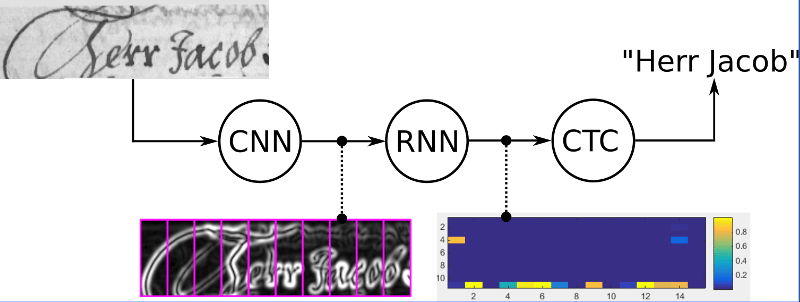

**CTC (Connectionist Temporal Classification) loss** is a loss function used in **deep learning models** for **sequence-to-sequence tasks** such as ***speech recognition, handwriting recognition, and text recognition***. The **CTC loss** is used to compute the **difference between the predicted output and the ground truth label**.

In the context of ***handwriting recognition***, the **CTC loss** takes in the **predicted sequence of characters** (in the form of **probability distribution** over the characters) and the **actual ground truth label** (which is a sequence of characters) and computes the difference between them. Since the length of the **predicted sequence** can be different from the **length of the ground truth label**, the **CTC loss** is used to align the **two sequences** by adding **blank characters** between the characters of the **predicted sequence**. This ensures that the length of the **predicted sequence matches the length of the ground truth label**.

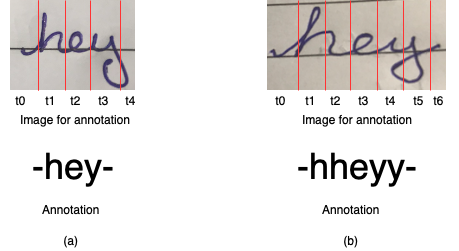

The **CTC loss** is calculated by **summing over all possible alignments** between the **predicted sequence** and the **ground truth label**. This is done by **dynamic programming**, which finds the most likely path through the **probability distribution of characters**. The **CTC loss function** then computes the **negative log probability** of the correct alignment. The goal of the **CTC loss** is to **minimize the difference between the predicted sequence and the ground truth label**.

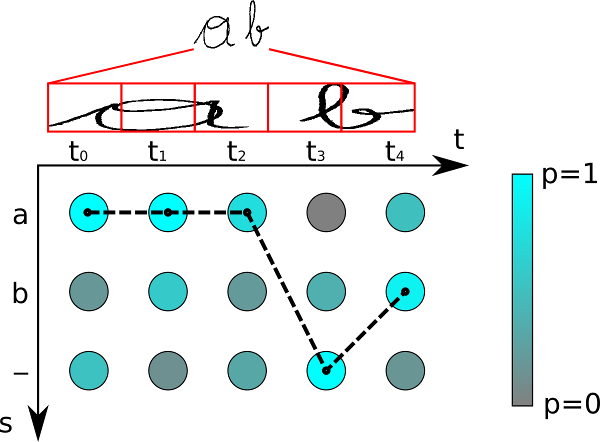

In summary, the **CTC loss** is used in ***sequence-to-sequence tasks*** to align the **predicted sequence and the ground truth label** by adding ***blank characters*** between the characters of the predicted sequence. The **CTC loss** is calculated by **dynamic programming**, and its goal is to ***minimize the difference between the predicted sequence and the ground truth label***.

In [17]:
class CTCLayer(layers.Layer):
    
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)
        
        self.loss_fn = keras.backend.ctc_batch_cost
    
    def call(self, y_true, y_pred):
        
        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
        
        input_len = tf.cast(tf.shape(y_pred)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_len = tf.cast(tf.shape(y_true)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')
        
        loss = self.loss_fn(y_true, y_pred, input_len, label_len)
        
        self.add_loss(loss)
        
        return y_pred

# **OCR Model**

The ***optical character recognition (OCR)*** model is a powerful combination of ***convolutional neural networks (CNNs)*** and ***recurrent neural networks (RNNs)***. The **CNNs** are used to extract **high-level features** from the input images, while the ***RNNs*** are used to **generate the corresponding text output**.

These **two types of neural networks** are combined in a **transformer-like architecture**, which can be thought of as an ***Encoder-Decoder architecture***. In this architecture, the ***CNN*** serves as the ***Encoder***, which encodes the **image features** into an **encoding space**. The ***RNN*** then acts as the ***Decoder***, which uses this **encoding space** to generate the **corresponding text output**.

The use of this architecture allows the model to handle the **challenging task of recognizing handwritten text**, which is **often messy and difficult to read**. By leveraging both the **spatial information** from the ***CNNs*** and the **temporal information** from the ***RNNs***, the OCR model can **accurately recognize even the most complex handwritten text**.

Furthermore, to train the **OCR model**, a **loss function** called the ***Connectionist Temporal Classification (CTC) loss*** is used. This loss function allows the model to learn how to align the **predicted text output with the actual text output**, even in cases where there may be **missing or extra characters** in the input image. Overall, the OCR model is a powerful and effective tool for recognizing text in a wide variety of settings.

In [18]:
# Input Layer
input_images = layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 1), name="image")

# Labels : These are added for the training purpose.
target_labels = layers.Input(shape=(None, ), name="label")

# CNN Network
x = layers.Conv2D(
    filters=32, 
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(input_images)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(
    filters=64, 
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Encoding Space
encoding = layers.Reshape(target_shape=((IMG_WIDTH//4), (IMG_HEIGHT//4)*64))(x)
encoding = layers.Dense(64, activation='relu', kernel_initializer='he_normal')(encoding)
encoding = layers.Dropout(0.2)(encoding)

# RNN Network
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(encoding)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

# Output Layer
output = layers.Dense(len(char_to_num.get_vocabulary())+1, activation='softmax')(x)

# CTC Layer
ctc_layer = CTCLayer()(target_labels, output)

# Model 
ocr_model = keras.Model(
    inputs=[input_images, target_labels],
    outputs=[ctc_layer]
)

In [19]:
# Model Summary
ocr_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 200, 50, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 200, 50, 32)  320         ['image[0][0]']                  
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 100, 25, 32)  0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 100, 25, 64)  18496       ['max_pooling2d[0][0]']      

**Model Visualization**

---

To gain a better understanding of the **OCR model architecture**, let's take a visual look at it. As we can see, the model is a combination of an ***encoder-decoder architecture*** and a **CTC layer** addition for training purposes. The **encoder side** of the model is comprised of a ***convolutional neural network*** that encodes the **image features into an encoding space**, while the **decoder side** is made up of a ***recurrent neural network*** that **decodes the text from the encoding space**. The **CTC layer** serves as the **connection** between the **encoder and decoder**, allowing the model to **learn and predict the sequence of characters in the text**. By visualizing the model architecture, we can better understand how it operates and how it is able to accurately recognize text from handwritten images.

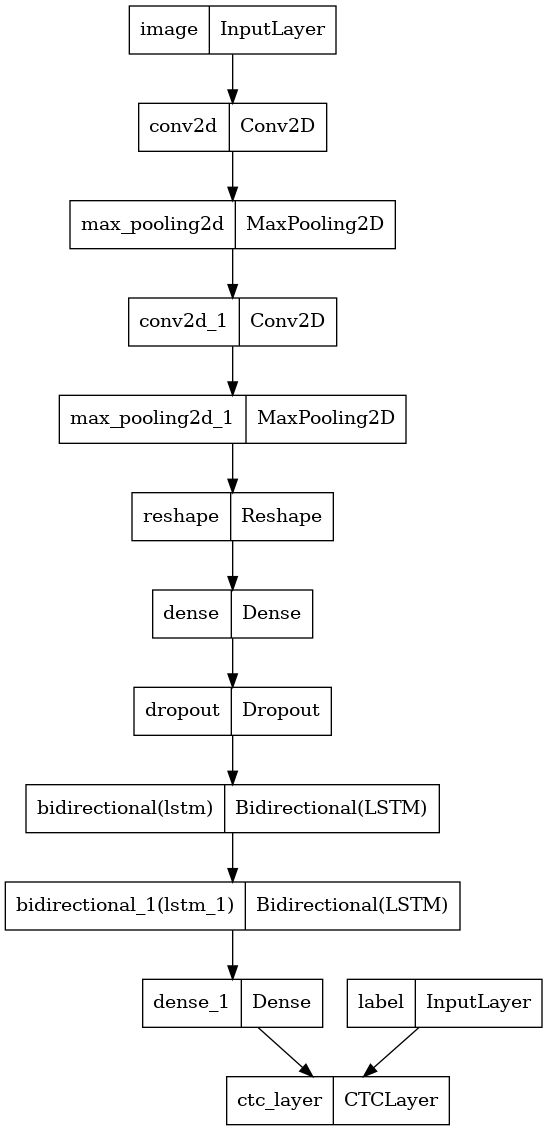

In [20]:
tf.keras.utils.plot_model(ocr_model)

Our model architecture is ready. It's time to train the model.

In [21]:
# Compile
ocr_model.compile(optimizer='adam')

# Train
history = ocr_model.fit(
    train_ds, 
    validation_data=valid_ds, 
    epochs=EPOCHS,
    callbacks=CALLBACKS
)

Epoch 1/100
1000/1000 [==============================] - 105s 90ms/step - loss: 20.8786 - val_loss: 20.2078
Epoch 2/100
1000/1000 [==============================] - 40s 40ms/step - loss: 19.3525 - val_loss: 19.0112
Epoch 3/100
1000/1000 [==============================] - 40s 40ms/step - loss: 18.7511 - val_loss: 18.5746
Epoch 4/100
1000/1000 [==============================] - 41s 41ms/step - loss: 18.4350 - val_loss: 18.3797
Epoch 5/100
1000/1000 [==============================] - 41s 41ms/step - loss: 18.1969 - val_loss: 18.0519
Epoch 6/100
1000/1000 [==============================] - 41s 41ms/step - loss: 17.3235 - val_loss: 16.4051
Epoch 7/100
1000/1000 [==============================] - 41s 41ms/step - loss: 15.8276 - val_loss: 14.6066
Epoch 8/100
1000/1000 [==============================] - 40s 40ms/step - loss: 13.7619 - val_loss: 12.1715
Epoch 9/100
1000/1000 [==============================] - 41s 41ms/step - loss: 11.7259 - val_loss: 10.2967
Epoch 10/100
1000/1000 [============

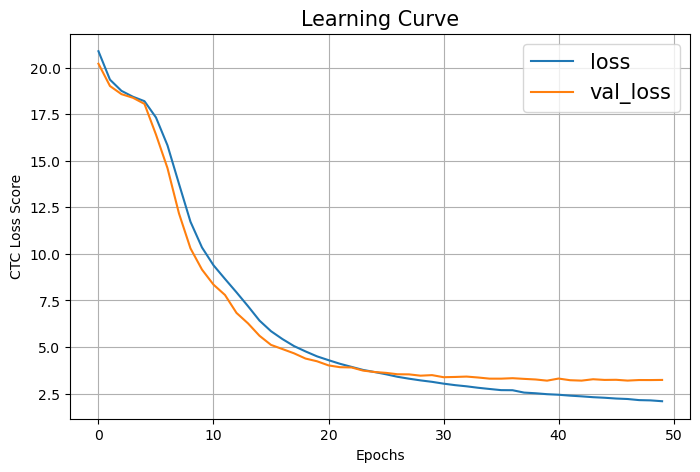

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.legend(fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("CTC Loss Score")
plt.title("Learning Curve", fontsize=15)
plt.grid()
plt.savefig("OCRModel-LearningCurve.png")
plt.show()

This is what we call a **nearly perfect training curve**. While it may appear that the **training loss diverges towards the end**, the **divergence is not significant**. Both the **training and validation loss continuously decrease**, which is a **positive sign**. This indicates that our model is able to understand the task well and is **learning to generalize well to new data**.

# **OCR Model Predictions**

In order to use our trained model for **making predictions**, we need to first **remove the CTC layer** from the model. This layer was added for **training purposes only** and is **not required for making predictions**. Once we have removed this layer, we can use the remaining ***encoder-decoder network*** for prediction.

However, the **output of this network** will be a **series of numeric values**, which represent the **probabilities of each character** being present in the image. To convert these **numeric values** into the **actual characters or categorical values**, we need a ***decoding function***.

This **decoding function** takes the **output of the model** and decodes it into the **final predicted text**. There are **different decoding strategies** that can be used, such as ***greedy decoding*** or ***beam search decoding***. The specific strategy used will depend on the requirements of the task and the characteristics of the data.

Once we have the **decoding function**, we can use it to convert the **model's output into the final predicted text**, which can then be compared to the **ground truth labels** to evaluate the **performance of the model**.

In [26]:
# Model required for inference
inference_model = keras.Model(
    inputs=ocr_model.get_layer(name="image").input,
    outputs=ocr_model.get_layer(name='dense_1').output
)

# Model summary
inference_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 50, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 200, 50, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 25, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 25, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 12, 64)       0         
 2D)                                                             
                                                                 
 reshape (Reshape)           (None, 50, 768)           0   

Now, as we have the inference model, let's focus on the **decoding function**

---
The **predictions generated** by the **OCR model** are in the form of a **matrix** where each **time step** represents the **probabilities for each character**. This means that for each **time step**, the model calculates the **likelihood of the output character being a certain character**.

The resulting **matrix** can be **quite complex** and may be **difficult to interpret at first glance**. However, if you have studied the ***Connectionist Temporal Classification (CTC)*** algorithm, this representation will be **easier to understand**. The **CTC algorithm** is a technique used to train the model to make predictions on sequences of variable length, which is often used in **speech and handwriting recognition tasks**.

In [59]:
def decode_pred(pred_label):
    
    '''
    The decode_pred function is used to decode the predicted labels generated by the OCR model.
    It takes a matrix of predicted labels as input, where each time step represents the probability 
    for each character. The function uses CTC decoding to decode the numeric labels back into their 
    character values. The function also removes any unknown tokens and returns the decoded texts as a
    list of strings. The function utilizes the num_to_char function to map numeric values back to their
    corresponding characters. Overall, the function is an essential step in the OCR process, as it allows
    us to obtain the final text output from the model's predictions.
    
    Argument : 
        pred_label : These are the model predictions which are needed to be decoded.
        
    Return:
        filtered_text : This is the list of all the decoded and processed predictions.
    
    '''
    
    # Input length
    input_len = np.ones(shape=pred_label.shape[0]) * pred_label.shape[1]
    
    # CTC decode
    decode = keras.backend.ctc_decode(pred_label, input_length=input_len, greedy=True)[0][0][:,:MAX_LABEL_LENGTH]
    
    # Converting numerics back to their character values
    chars = num_to_char(decode)
    
    # Join all the characters
    texts = [tf.strings.reduce_join(inputs=char).numpy().decode('UTF-8') for char in chars]
    
    # Remove the unknown token
    filtered_texts = [text.replace('[UNK]', " ").strip() for text in texts]
    
    return filtered_texts

Let's see this function working.

In [60]:
print(decode_pred(inference_model.predict(test_ds)))

100/100 [==============================] - 1s 12ms/step
['KEVIN', 'LOT', 'LENA', 'JULES', 'CHERPIN', 'MARTIN', 'VALENTINE', 'LORAS', 'THIBAULT', 'AEADI', 'BORTCHAROFE', 'MAMENTHIRAN', 'PRANCOSSSAE', 'JEANNE', 'DEBORAM', 'BROUES', 'JAE', 'CORMIL PRERROT', 'CLEMENT', 'AELIS', 'MAHIZATR FATIM', 'FOURNEL', 'DIGINTIOILLESCA', 'BARDOT', 'DUVAL', 'ANTONY', 'LISA', 'CELIA', 'CRODIKE', 'HUGO', 'HUGO', 'ELOUEN', 'SCHOCMAICKER', 'MORRAU', 'STFENRERSTE', 'DI FONCO', 'GUIREY', 'RONAN', 'MILLE', 'CAROLINE', 'PAUL', 'BELHARA', 'DIBOS', 'JEAN CONE', 'DAEMIN', 'CLOVIS', 'JORIS', 'MARUINI', 'CLAIRE', 'RAFFORT', 'ICHOROTS', 'DEBUYSSCHER', 'ALEXANDRE', 'RAPHAEL', 'KAIREDPINE', 'UMUT', 'GOUKAUD', 'ROMAN', 'LEBERMAN', 'MOBIER', 'MARDY', 'ALEXANDRE', 'BOULANGER', 'MARWANE', 'PARIS', 'MELANIE', 'NOUASE', 'LEVRIT', 'PARENT', 'DELCHENES', 'MAMAULT', 'DAGDAG', 'DUCHAINE', 'AYOUL', 'KAREN', 'AIEHIA', 'EIEAH', 'BEAUCHET', 'KEVIN', 'ZAMBEIMI', 'ALESSI', 'CHARLES', 'ELIA', 'ALEXANDRE', 'ROY-COUTELLIER', 'LEILI', 'TA

This function seems to **work perfectly fine** for **decoding the predicted labels**, but to gain better **insight and understanding**, it would be beneficial to have a **visual representation** of the **model's predictions**.

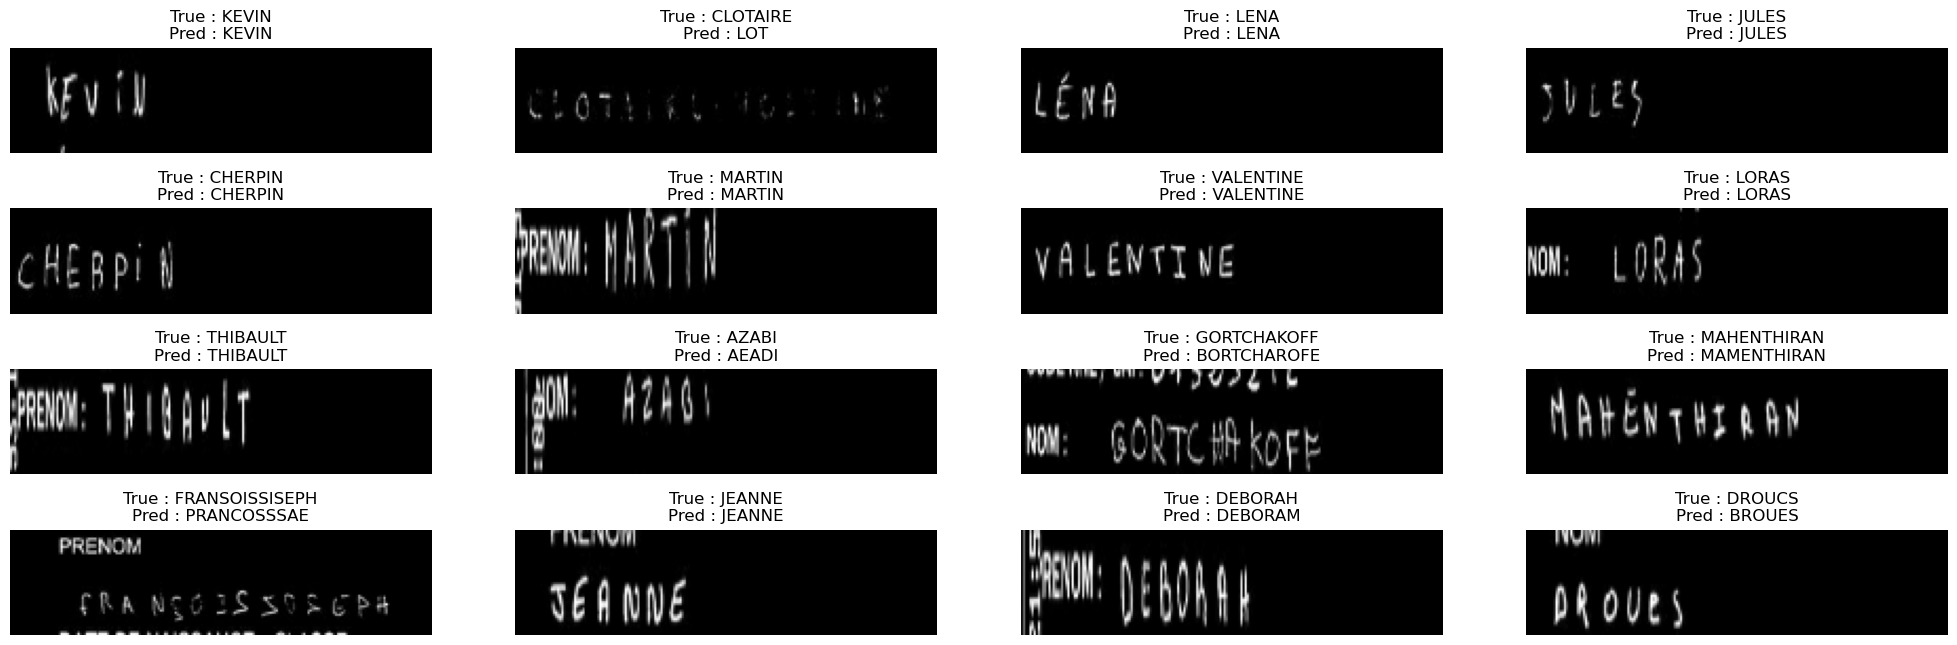

In [78]:
show_images(data=test_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

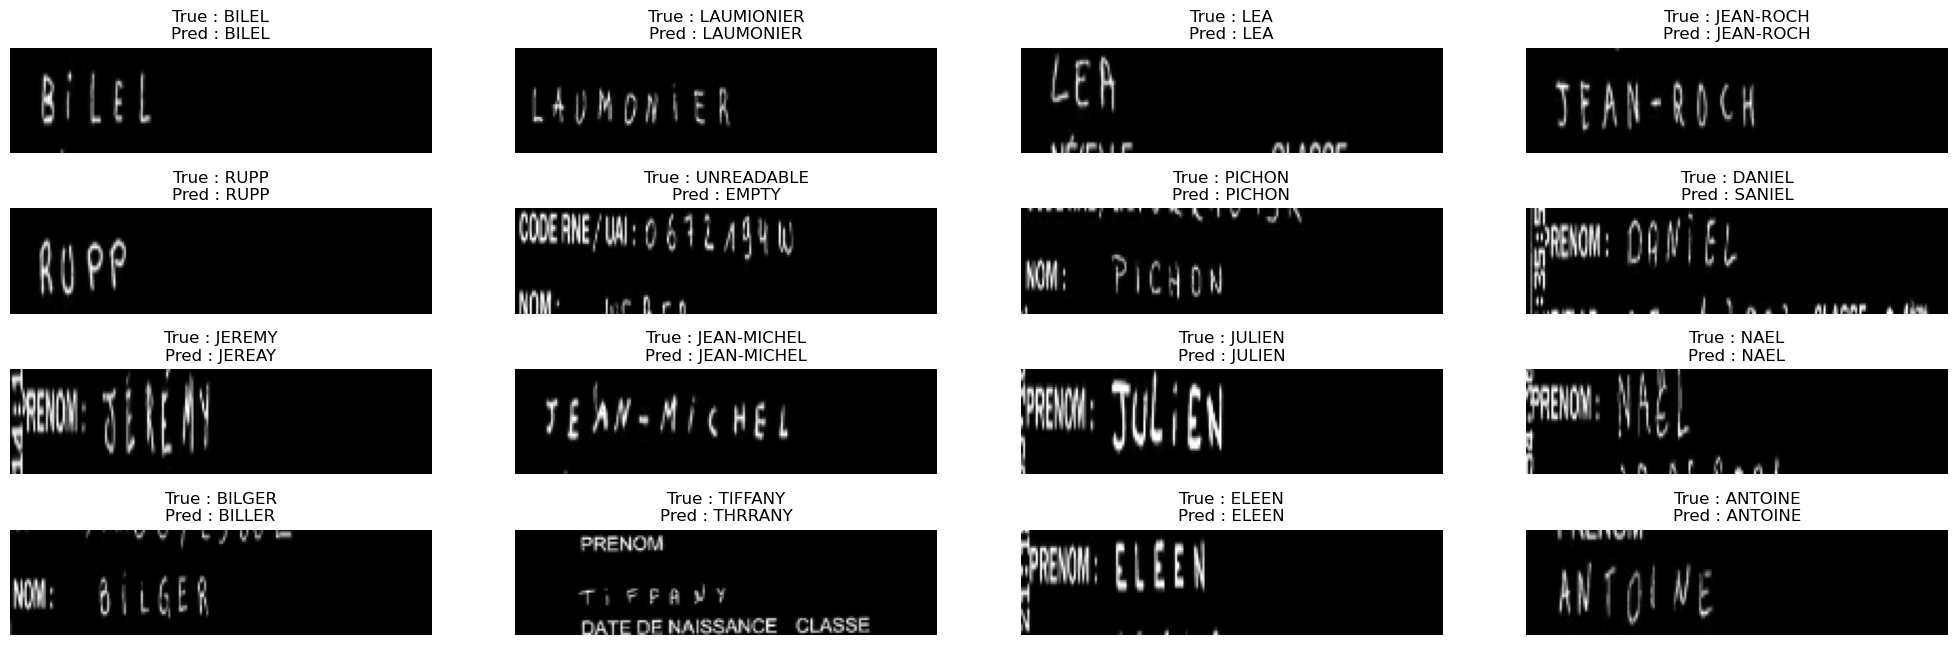

In [79]:
show_images(data=valid_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

Upon inspection, **most of the predictions were correct** except for a **few cases where mistakes were made**. These cases include:

* ***CLOTAIRE***: The model predicted it as LOT, which is understandable since the text is difficult to read due to parts being erased and not visible clearly, especially the middle part. Although the model could have detected the letter C, it would not have been possible to detect the rest of the characters as they are not clear even to the human eye.

* ***AZABI***: The model predicted it as AEADI, which I disagree with since it's clear that the letter is Z, not E. This indicates that there is room for improvement in the model.

In a few other cases, the model appears to be **confused** between **D&B and G&B**, indicating that the **model thinks everything is a B** if it has a **curve on the right side**. However, for cases where the **writing is clearly visible**, **all predictions were accurate**. Further **fine-tuning** of the model could improve its performance in situations where the **handwritten text is not properly illuminated or the writings are not clearly visible or are erased**.

# **OCR Model - Improved**

Let's try to change the model architecture,

Epoch 1/100
1000/1000 [==============================] - 59s 49ms/step - loss: 20.4903 - val_loss: 19.8626
Epoch 2/100
1000/1000 [==============================] - 46s 46ms/step - loss: 19.4111 - val_loss: 18.8399
Epoch 3/100
1000/1000 [==============================] - 47s 47ms/step - loss: 18.6109 - val_loss: 18.5172
Epoch 4/100
1000/1000 [==============================] - 46s 46ms/step - loss: 18.1593 - val_loss: 17.8418
Epoch 5/100
1000/1000 [==============================] - 46s 46ms/step - loss: 17.4810 - val_loss: 16.7361
Epoch 6/100
1000/1000 [==============================] - 46s 46ms/step - loss: 14.6875 - val_loss: 9.3600
Epoch 7/100
1000/1000 [==============================] - 46s 46ms/step - loss: 6.7338 - val_loss: 4.4038
Epoch 8/100
1000/1000 [==============================] - 46s 46ms/step - loss: 4.0205 - val_loss: 3.1555
Epoch 9/100
1000/1000 [==============================] - 47s 47ms/step - loss: 3.0473 - val_loss: 2.8620
Epoch 10/100
1000/1000 [====================

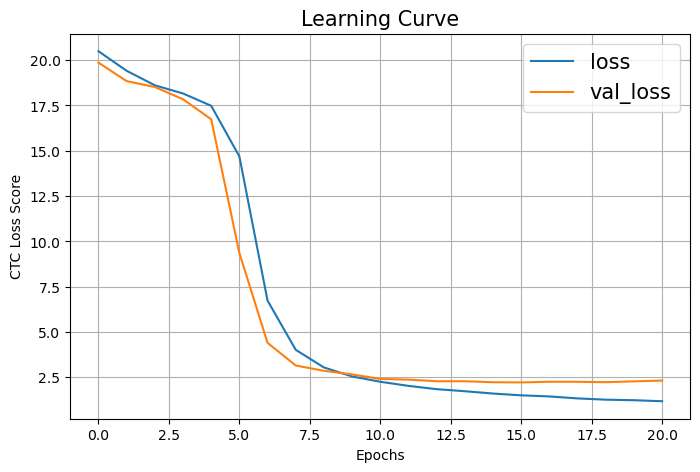

In [80]:
# Input Layer
input_images = layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 1), name="image")

# Labels : These are added for the training purpose.
target_labels = layers.Input(shape=(None, ), name="label")

# CNN Network
x = layers.Conv2D(
    filters=32, 
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(input_images)

x = layers.Conv2D(
    filters=32, 
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(
    filters=64, 
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)

x = layers.Conv2D(
    filters=128, 
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Encoding Space
encoding = layers.Reshape(target_shape=((IMG_WIDTH//4), (IMG_HEIGHT//4)*128))(x)
encoding = layers.Dense(64, activation='relu', kernel_initializer='he_normal')(encoding)
encoding = layers.Dense(128, activation='relu', kernel_initializer='he_normal')(encoding)
encoding = layers.Dropout(0.4)(encoding)

# RNN Network
x = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.25))(encoding)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)

# Output Layer
output = layers.Dense(len(char_to_num.get_vocabulary())+1, activation='softmax')(x)

# CTC Layer
ctc_layer = CTCLayer()(target_labels, output)

# Model 
ocr_model_2 = keras.Model(
    inputs=[input_images, target_labels],
    outputs=[ctc_layer]
)

# Compile
ocr_model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))

# Train
history_2 = ocr_model_2.fit(
    train_ds, 
    validation_data=valid_ds, 
    epochs=EPOCHS,
    callbacks=[
        callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]
)

# Learning Curve
pd.DataFrame(history_2.history).plot(figsize=(8,5))
plt.legend(fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("CTC Loss Score")
plt.title("Learning Curve", fontsize=15)
plt.grid()
# plt.savefig("OCRModel-LearningCurve.png")
plt.show()

In [82]:
# Model required for inference
inference_model_2 = keras.Model(
    inputs=ocr_model_2.get_layer(name="image").input,
    outputs=ocr_model_2.get_layer(name='dense_4').output
)

# Model summary
inference_model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 50, 1)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 50, 32)       320       
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 50, 32)       9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 100, 25, 32)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 25, 64)       18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 25, 128)      73856     
                                                           

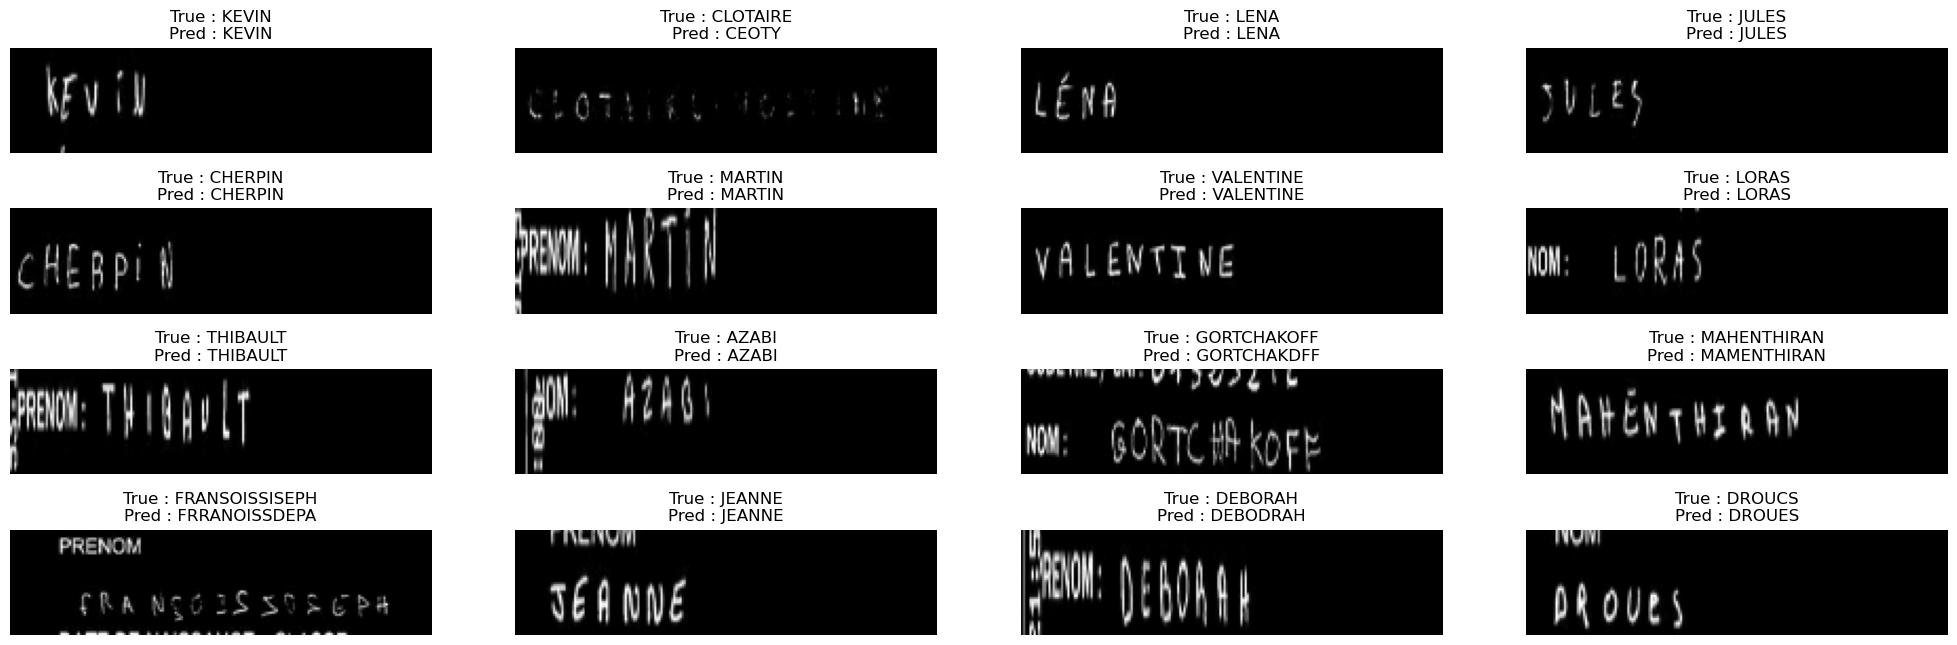

In [83]:
show_images(data=test_ds, model=inference_model_2, decode_pred=decode_pred, cmap='binary')

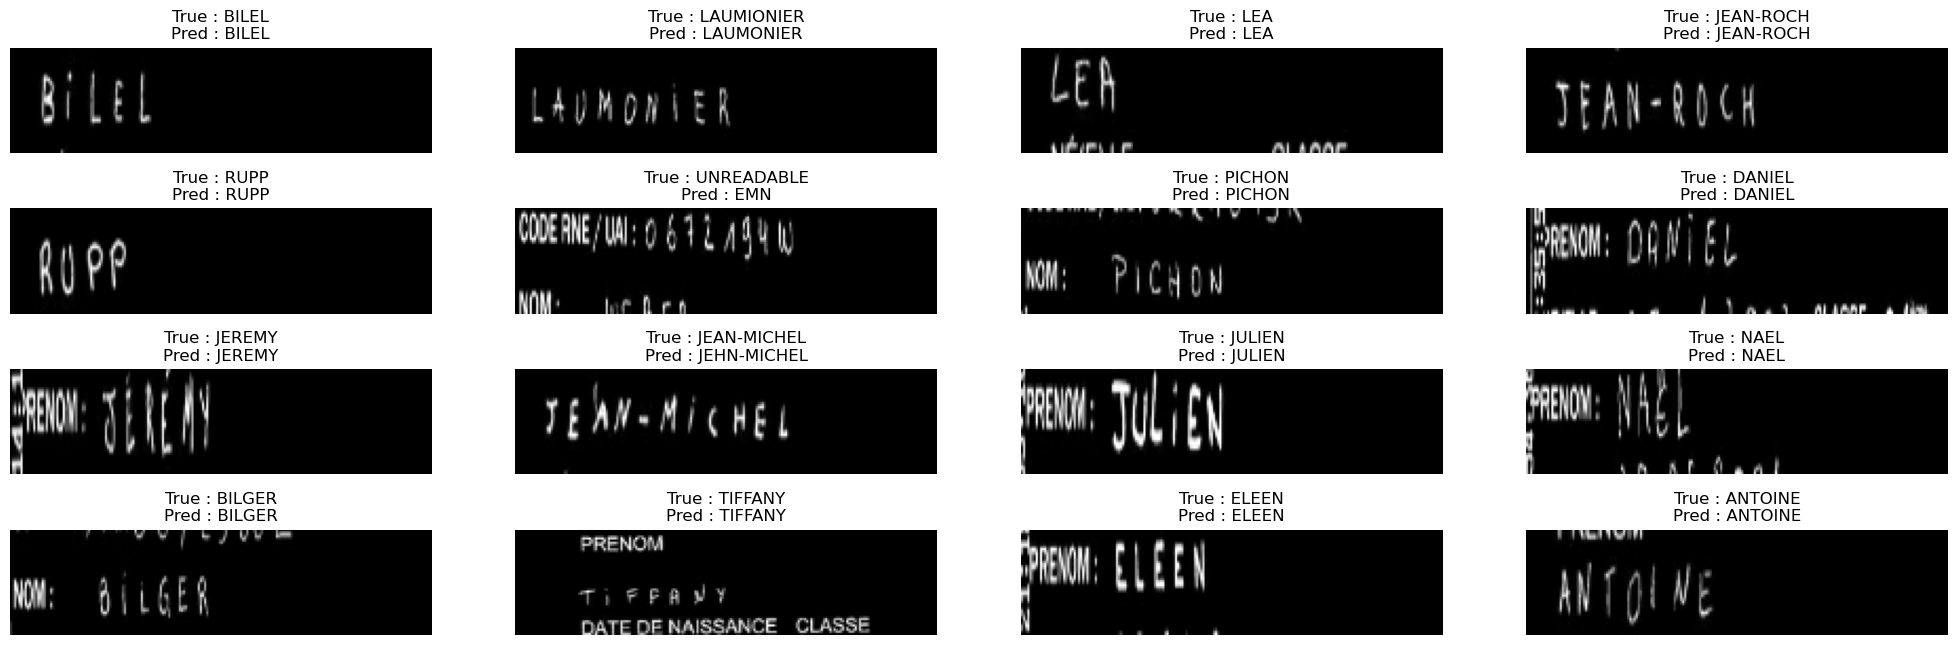

In [84]:
show_images(data=valid_ds, model=inference_model_2, decode_pred=decode_pred, cmap='binary')

Certainly, I can provide a **clearer explanation** of the **two main points** behind the **new model's improvement**:

* The **first main point of improvement** involves the **feature extraction** process of the **Convolutional Neural Network (CNN)** used in the model. In the previous version, the **feature extraction** process was **not effective** in **detecting certain characters and often misidentified others**. To address this issue, the **CNN feature extraction** process was enhanced to **better extract image features**. This means that the **CNN** was trained to **recognize more complex patterns and features** in the input image data, which can help it to **better differentiate between characters and improve the accuracy of the model's predictions**.

* The **second main point** of improvement involved the **embedding space** used by the **Recurrent Neural Network (RNN)** path of the model. The **embedding space** is essentially a **mathematical representation** of the **input image data** that is used to **train the RNN path**. By creating another **dense layer**, the **embedding space** was enhanced to be able to **store more information** and make **more efficient projections**. This **improved embedding space** allowed the **RNN path** to **extract more features** and **information from the input data**, which in turn improved the **accuracy of the model's predictions**.

Overall, these **two main improvements work** together to create a **more accurate and effective model** for **character recognition**. By improving both the **feature extraction process** and the **embedding space** used by the **RNN path**, the model is better able to **recognize and differentiate between different characters**, resulting in **more accurate predictions**.

---